In [1]:
import pandas as pd
import numpy as np 

In [2]:
u_data = pd.read_csv('u.data',delimiter='\t',names=['userId','movieId','rating','timestamp'])
u_data_sorted = u_data.sort_values(['userId','movieId'])

In [3]:
matrix = np.zeros((1682,943),dtype=int)
u_data_sorted_array = u_data_sorted.to_numpy()

In [4]:
for i in u_data_sorted_array:
    matrix[i[1]-1][i[0]-1]=i[2]
#matrix

In [5]:
rated_unrated_mat = np.zeros((1682,943),dtype=int)
row_index = 0
col_index = 0
for i in matrix:
    for j in i:
        if j!=0:
            rated_unrated_mat[row_index][col_index]=1
        col_index+=1
    row_index+=1
    col_index = 0

In [6]:
movies_rated_per_user = rated_unrated_mat.sum(axis=0)
movies_watched = rated_unrated_mat.sum(axis=1)

In [7]:
unrated_movies_per_user = 1682-movies_rated_per_user
movies_unwatched = 943-movies_watched

In [8]:
#unrated_movies_per_user

In [9]:
zeros = unrated_movies_per_user.sum()


In [10]:
#movies_unwatched

count the zeros and find the possiblities and find the percentage

In [11]:
#sparcity percentage
total = 1682*943
sparcity = (zeros/total)*100
sparcity

93.69533063577546

In [12]:
u_item = pd.read_csv('u.item',delimiter='|',names=list('abcdefghijklmnopqrstuvwx'))

In [13]:
u_item = u_item[u_item['c'].notnull()]

In [14]:
u_item_date_array = u_item['c'].to_numpy()

In [15]:
release_year = np.zeros((1681),dtype=int)

In [16]:
index = 0
for i in u_item_date_array:
    temp = i.split('-')
    release_year[index] = int(temp[2])
    index+=1

In [17]:
release_year.sort()

In [18]:
 release_year_x =np.unique(release_year)
 yearcount_y = np.zeros(71,dtype=int)

In [19]:
index=0
for i in release_year_x:
    count=0
    for j in release_year:
        if i == j :
            count+=1
    yearcount_y[index]=count
    index+=1

<BarContainer object of 71 artists>

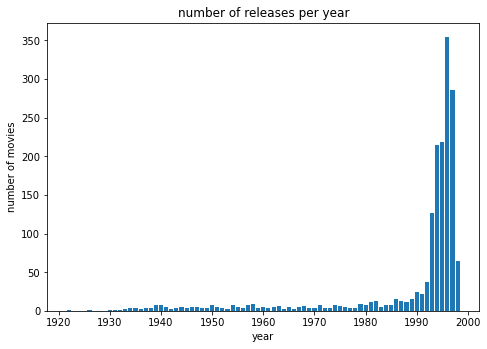

In [20]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.set_title('number of releases per year')
ax1.set_xlabel("year")
ax1.set_ylabel('number of movies')
ax1.bar(release_year_x,yearcount_y)

In [21]:
u_user = pd.read_csv('u.user',delimiter='|',names=['userId','age','gender','occupation','zipcode'])
u_user_sorted = u_user.sort_values('age')
ages = np.unique(u_user_sorted.age)

In [22]:
u_user_agegrouped_count = u_user_sorted.groupby(['age']).count()['userId']

In [23]:
u_user_agegrouped_count = u_user_agegrouped_count.to_numpy()

In [24]:
u_user_agegrouped_count

array([ 1,  1,  1,  5,  3,  6,  5, 14, 18, 23, 32, 27, 37, 28, 33, 38, 34,
       35, 36, 32, 39, 25, 28, 26, 17, 27, 21, 19, 17, 22, 21, 10, 21, 13,
       23, 15, 12, 14, 20, 19, 20, 20,  6, 12,  4, 11,  6,  9,  3,  3,  9,
        3,  2,  3,  2,  3,  1,  2,  2,  3,  1], dtype=int64)

<BarContainer object of 61 artists>

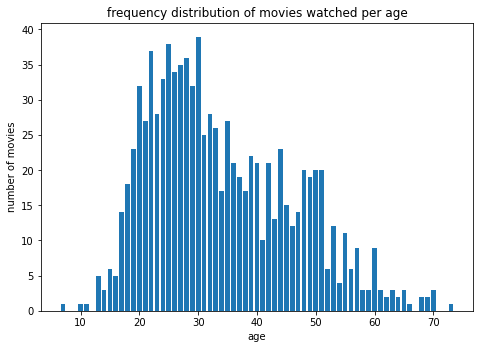

In [25]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0,0,1,1])
ax2.set_title('frequency distribution of movies watched per age')
ax2.set_xlabel("age")
ax2.set_ylabel('number of movies')
ax2.bar(ages,u_user_agegrouped_count)

In [26]:
u_user_sorted = u_user.sort_values('occupation')
occupation = np.unique(u_user_sorted.occupation)

In [27]:
occupation_grouped = u_user_sorted.groupby('occupation').count()

In [28]:
occupation_grouped = occupation_grouped.userId.to_numpy()

<BarContainer object of 21 artists>

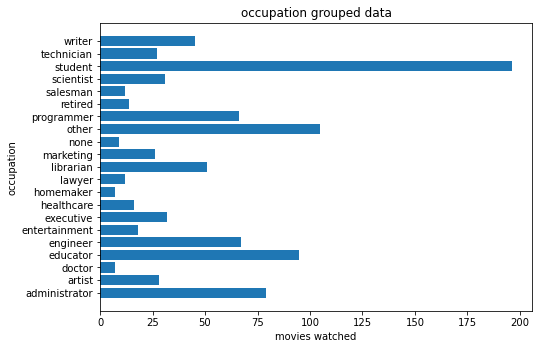

In [29]:
fig3 = plt.figure()
ax3 = fig3.add_axes([0,0,1,1])
ax3.set_title('occupation grouped data')
ax3.set_ylabel('occupation')
ax3.set_xlabel('movies watched')
ax3.barh(occupation,occupation_grouped,align='center')

In [30]:
u_data_sorted

,userId,movieId,rating,timestamp
32236,1,1,5,874965758
23171,1,2,3,876893171
83307,1,3,4,878542960
62631,1,4,3,876893119
47638,1,5,3,889751712
...,...,...,...,...
68857,943,1067,2,875501756
74200,943,1074,4,888640250
78704,943,1188,3,888640250
86600,943,1228,3,888640275


In [31]:
user_movie = u_data_sorted[['userId','movieId']]
u_user_gender = u_user.gender
u_user_gender = u_user_gender.to_numpy()

In [32]:
user_movie_array = user_movie.to_numpy()

In [33]:
user_movie_array

array([[   1,    1],
       [   1,    2],
       [   1,    3],
       ...,
       [ 943, 1188],
       [ 943, 1228],
       [ 943, 1330]], dtype=int64)